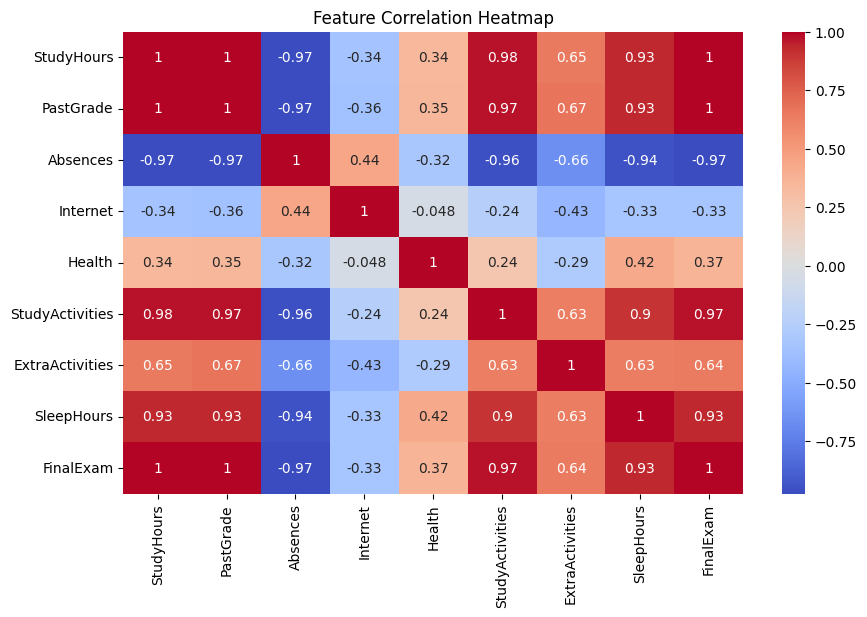

Predictions:  [84.17 56.55 73.56]
Actual:       [85, 56, 72]
MSE:  1.14
R² Score: 0.99


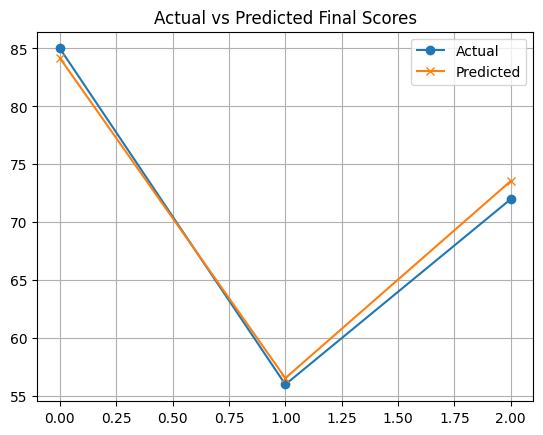


--- Predict Your Score ---
Study Hours: 8
Past Grade: 100
No. of Absences: 0
Internet Access (1=Yes, 0=No): 1
Health Status (1-5): 5
No. of Study Activities: 10
Extra Activities? (1=Yes, 0=No): 1
Sleep Hours: 8

🎯 Your Predicted Final Score: 95.8


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

data = {
    'StudyHours':         [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'PastGrade':          [45, 52, 58, 60, 65, 70, 75, 78, 82, 87],
    'Absences':           [12, 10, 9, 6, 5, 4, 3, 2, 2, 1],
    'Internet':           [1, 1, 1, 1, 1, 0, 0, 0, 1, 1],
    'Health':             [3, 4, 3, 2, 5, 4, 3, 4, 3, 5],  # 1 (worst) to 5 (best)
    'StudyActivities':    [1, 2, 2, 3, 3, 3, 4, 4, 5, 5],
    'ExtraActivities':    [0, 0, 1, 1, 0, 1, 1, 1, 1, 1],
    'SleepHours':         [5, 6, 6, 7, 7, 8, 7, 8, 8, 9],
    'FinalExam':          [50, 56, 61, 63, 69, 72, 77, 81, 85, 90]
}
df = pd.DataFrame(data)

plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

features = ['StudyHours', 'PastGrade', 'Absences', 'Internet',
            'Health', 'StudyActivities', 'ExtraActivities', 'SleepHours']
X = df[features]
y = df['FinalExam']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Predictions: ", np.round(y_pred, 2))
print("Actual:      ", list(y_test))
print("MSE: ", round(mean_squared_error(y_test, y_pred), 2))
print("R² Score:", round(r2_score(y_test, y_pred), 2))

plt.plot(list(y_test), label='Actual', marker='o')
plt.plot(y_pred, label='Predicted', marker='x')
plt.legend()
plt.title("Actual vs Predicted Final Scores")
plt.grid(True)
plt.show()

print("\n--- Predict Your Score ---")
inputs = []
questions = [
    "Study Hours: ",
    "Past Grade: ",
    "No. of Absences: ",
    "Internet Access (1=Yes, 0=No): ",
    "Health Status (1-5): ",
    "No. of Study Activities: ",
    "Extra Activities? (1=Yes, 0=No): ",
    "Sleep Hours: "
]

for q in questions:
    val = float(input(q))
    inputs.append(val)

your_score = model.predict([inputs])
print("\n🎯 Your Predicted Final Score:", round(your_score[0], 2))
